In [ ]:
#Тут константы: итерация 0(особая), входящий поток, значение черной дыры и забивочные переменные х,у для определения весов ребер. Тут граф строится
c = 0
w_In = 1500000
x = 0
y = 0
votes_Quote_Achieve_Iteration = 0

listOfEdges =[['s','Greece'], ['s','Bulgaria'], ['s','Italy'], ['s','Spain'], ['s','Albania'],
              ['Greece','Bulgaria'], ['Greece','NM'],['Greece','Albania'],['Greece','Italy'],['Greece','Croatia'],
              ['Greece','Slovenia'], ['Bulgaria', 'Romania'], ['Bulgaria', 'NM'], ['Bulgaria', 'Serbia'], ['NM','Albania'],
              ['NM','Kosovo'], ['NM','Serbia'], ['Albania','Italy'], ['Albania','MNE'], ['Albania','Kosovo'],
              ['Albania','Croatia'], ['Albania','Slovenia'], ['Kosovo','Serbia'], ['Kosovo','MNE'],['Romania','Hungary'],
              ['Romania','Serbia'],['Serbia','MNE'],['Serbia','BH'],['Serbia','Croatia'],['Serbia','Hungary'],['MNE','BH'],
              ['MNE','Croatia'],['MNE','Slovenia'],['MNE','Italy'],['BH','Croatia'],['BH','Italy'],['Croatia','Slovenia'],
              ['Croatia','Hungary'],['Croatia','Italy'],['Slovenia','Italy'],['Slovenia','Austria'],['Slovenia','Hungary'],
              ['Hungary','Slovakia'],['Hungary','Austria'],['Slovakia','Austria'],['Slovakia','CZ'],['Slovakia','Poland'],
              ['Austria','Italy'],['Austria','Swiss'],['Austria','Germany'],['Austria','CZ'],['CZ','Germany'],['CZ','Poland'],
              ['Poland','Lithuania'],['Poland','Germany'],['Poland','Latvia'],['Poland','Estonia'],['Poland','Finland'],
              ['Poland','Sweden'],['Poland','Denmark'],['Lithuania','Latvia'],['Lithuania','Estonia'],['Lithuania','Finland'],
              ['Lithuania','Sweden'],['Lithuania','Denmark'],['Lithuania','Germany'],['Latvia','Estonia'],['Latvia','Finland'],
              ['Latvia','Sweden'],['Latvia','Denmark'],['Latvia','Germany'],['Estonia','Finland'],['Estonia','Sweden'],
              ['Estonia','Denmark'],['Estonia','Germany'],['Finland','Sweden'],['Finland','Norway'],['Finland','Denmark'],
              ['Finland','Germany'],['Sweden','Norway'],['Sweden','Denmark'],['Sweden','Germany'],['Norway','Denmark'],['Norway','Germany'],
              ['Denmark','Germany'],['Denmark','Netherlands'],['Germany','Netherlands'],['Germany','Belgium'],['Germany','Luxemburg'],
              ['Germany','France'],['Germany','Swiss'],['Netherlands','UK'],['Netherlands','Belgium'],['Netherlands','France'],
              ['UK','France'],['UK','Ireland'],['UK','Belgium'],['Belgium','Luxemburg'],['Belgium','France'],['Luxemburg','France'],
              ['France','Swiss'],['France','Italy'],['France','Spain'],['Swiss','Italy'],['Italy','Spain'],
              ['Spain','Portugal'],['Greece','q'],['Bulgaria','q'],['NM','q'],['Albania','q'],['Kosovo','q'],['Romania','q'],
              ['Serbia','q'],['MNE','q'],['BH','q'],['Croatia','q'],['Slovenia','q'],['Hungary','q'],['Slovakia','q'],['Austria','q'],
              ['CZ','q'],['Poland','q'],['Lithuania','q'],['Latvia','q'],['Estonia','q'],['Finland','q'],['Sweden','q'],['Norway','q'],
              ['Denmark','q'],['Germany','q'],['Netherlands','q'],['UK','q'],['Belgium','q'],['Luxemburg','q'],['France','q'],['Swiss','q'],
              ['Italy','q'],['Spain','q'],['Portugal','q']]

#ParametersSheets are [Population 2022 (thousands), GDP at 2022 (thousands), medianNetSalary (eu/hour in prices of 2022), avgWageShift per 1k migrants,
#wage per capita(wage*Labour force/GDP), wageElasticity (dlog(|Shift|)/dlog(|LF|)),
#integrationCosts (thousands euro per migrant) (=1*(min wage 2023) OR (median wage in 2020(+avg.inflation rate by complex percent)) - (standard customer basket for 2 adults+1children*12months))]
verticesDict = {'s': [w_In, 0, 0, 0, 0, 0, 0],
                'Greece': [10858, 196690000, 8, -0.00155, 0.55,  -0.7434, 14.508],
                'Bulgaria': [7030, 50201000, 4.05, -0.000843, 0.41,  -0.68827, 14.22],
                'NM': [2069, 10067000, 3.57, -0.00319, 0.543, -0.60677, 13.896],
                'Albania': [2886, 11364000, 2.47, -0.001365, 0.47, -0.8869, 16.44],
                'Kosovo': [1805, 6444000, 3.1, -0.0057, 0.5, -0.45321, 8.4],
                'Romania':[19871, 177895000, 5.55, -0.00049, 0.39, -0.63026, 12.588],
                'Serbia':[7114, 39629000, 4.43, -0.00096, 0.48, -0.68144, 17.496],
                'MNE':[622, 4055000, 3.1, -0.00901, 0.6, -0.84174, 13.524],
                'BH':[3825, 16210000, 4.83, -0.00293, 0.69, -0.61787, 12.948],
                'Croatia':[4181, 49519000, 6.82, -0.0022, 0.485, -0.68828, 16.944],
                'Slovenia':[2063, 43124000, 10.47, -0.00814, 0.47, -0.56358, 18.624],
                'Hungary':[9816, 123074000, 5.73, -0.00099, 0.42, -0.62456, 13.524],
                'Slovakia':[5421, 87814000, 7.72, -0.00223, 0.38, -0.63434, 15.936],
                'Austria':[8585, 381998000, 17.65, -0.00341, 0,57, -0.549, 16.273],
                'CZ':[10538, 186830000, 8.23, -0.00147, 0.37, -0.48676, 16.632],
                'Poland':[38006, 477568000, 6.9, -0.0003, 0.47, -0.79847, 15.048],
                'Lithuania':[2927, 41538000, 8.82, -0.00361, 0.34, -0.6298, 15.336],
                'Latvia':[1986, 26986000, 7.15, -0.0055, 0.4, -0.58057, 15.768],
                'Estonia':[1315, 22916000, 9.38, -0.00988, 0.43, -0.51327, 17.196],
                'Finland':[5472, 232582000, 19.33, -0.00645, 0.557, -0.50103, 14.52],
                'Sweden':[9747, 498118000, 19.29, -0.00333, 0.516, -0.51626, 11.593],
                'Norway':[5166, 386663000, 31.49, -0.00964, 0.49, -0.43272, 13.988],
                'Denmark':[5660, 302673000, 29.83, -0.00911, 0.574, -0.4451, 18.633],
                'Germany':[81198, 3383091000, 19.39, -0.00041, 0.66, -0.69366, 13.5],
                'Netherlands':[16901, 765650000, 18.95, -0.00182, 0.65, -0.53743, 10.260],
                'UK':[64853, 2897060000, 18.2, -0.00047, 0.64, -0.67044, 12.444],
                'Ireland':[4678, 290858000, 20.25, -0.00736, 0.358, -0.43779, 15.744],
                'Belgium':[11237, 456067000, 23.84, -0.00369, 0,564, -0.51128, 8.232],
                'Luxemburg':[527, 57233000, 23.99, -0.06058, 0.31, -0.31093, 13.008],
                'France':[66458, 2439435000, 16.81, -0.00051, 0.527, -0.6092, 13.38],
                'Swiss':[8238, 679721000, 37.64, -0.00656, 0.635, -0.6361, 14.4],
                'Italy':[60295, 1833195000, 13.05, -0.0005, 0.475, -0.62327, 12.294],
                'Spain':[46426, 1199688000, 11.02, -0.00044, 0.565, -0.63569, 12.516],
                'Portugal':[10395, 199521000, 6.24, -0.00106, 0.5, -0.69688, 16.332],
                'q':[1000000, 0, 0, 0, 0, 0, 0]
}

dataPaL10mln = {'Iteration': [], 'TotalProfit': [], 'TotalLosses': [], 'PureProfit': [], 'Greece': [], 'Bulgaria': [], 'Italy': [], 'Spain': [], 'Albania': [], 'NM': [], 'Croatia': [], 'Slovenia': [], 'Romania': [], 'Serbia': [], 'Kosovo': [], 'MNE': [], 'Hungary': [], 'BH': [], 'Austria': [], 'Slovakia': [], 'CZ': [], 'Poland': [], 'Swiss': [], 'Germany': [], 'Lithuania': [], 'Latvia': [], 'Estonia': [], 'Finland': [], 'Sweden': [], 'Denmark': [], 'Norway': [], 'Netherlands': [], 'Belgium': [], 'Luxemburg': [], 'France': [], 'UK': [], 'Ireland': [], 'Portugal': []}

ProfitsVectorByAgents = 0
alpha = 0.37
crimeRatio = 0.01
remittancesRatio = 0.3
reproductionRatio = 0.1
inflationRatio = 0.05
socialEnthropyRatio = 0.05


value_list = []
InterQlist = []
voting_Vector=[]
all_Votes_Vector = []
countries_Vector=[]
total_Voting=[]
SolowModelProfitsVector = []
ProfitsVectorByAgents = []
OverallProfitsByIteration = []
list_for_K=[]
coalition=[]
players_coalition=[]
players_to_share=[]
coalition_profit=[]
profit_a = []
profits_M = []
ShrinkedList = []


#Тут мы строим репрезентацию графа по edge и смотрим нужные списки вершин, например списки соседей
import matplotlib.pyplot as plt
import networkx as nx
import math
import numpy as np
import pandas as pd

def ShrList (lst, n):
  ShrinkedList.clear()
  ShrinkedList.append(list(round(j, n) for j in lst))
  np.squeeze(ShrinkedList)
  return ShrinkedList

def flatten_list(nested_list):
  return [*nested_list[0]]

G = nx.Graph()

#w_q = -1*w_In
#def omegaCount(G, edgeNumber):
  #omega = min(verticesDict.get(listOfEdges[edgeNumber][0])[0]*0.01, verticesDict.get(listOfEdges[edgeNumber][1])[0]*0.01)
  #eturn omega

#reframingList = [(listOfEdges[item][0], listOfEdges[item][1], omegaCount(G, item)) for item in range(len(listOfEdges))]
#G.add_weighted_edges_from(reframingList)
#pos = nx.arf_layout(G, seed = 424242)

#options = {
#    "font_size": 14,
#    "node_size": 6500,
#    "node_color": "lightblue",
#    "edgecolors": "black",
#    "linewidths": 2,
#    "width": 3,
#}

#plt.figure(figsize =(16,16))
#nx.draw_networkx(G, pos, **options)

In [ ]:
def FullCFModel(w_In, listOfEdges, verticesDict, alpha, crimeRatio, remittancesRatio, reproductionRatio, socialEnthropyRatio):
  w_q = -1*w_In
  def omegaCount(G, edgeNumber):
    omega = min(verticesDict.get(listOfEdges[edgeNumber][0])[0]*0.001, verticesDict.get(listOfEdges[edgeNumber][1])[0]*0.001)
    return omega

  reframingList = [(listOfEdges[item][0], listOfEdges[item][1], omegaCount(G, item)) for item in range(len(listOfEdges))]
  G.add_weighted_edges_from(reframingList)

  #elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 1]
  #esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 1]

  #pos = {'s': (2, -0.5), 'Germany': (0, -0.5), 'France': (1, 0.0), 'MNE': (0, 0.0), 'Greece': (-1, 0.0), 'Spain':(0, 0.5), 'q':(-1, -1)}

  #options = {
      #"font_size": 18,
      #"node_size": 6000,
      #"node_color": "white",
      #"edgecolors": "black",
      #"linewidths": 5,
      #"width": 10,
  #}
  #plt.figure(figsize =(16,16))
  #nx.draw_networkx(G, pos, **options)


  def omega1(x, y, c, G):
    if G.has_edge(x, y):
      if x == 's':
        omega = w_In/G.degree['s']
      elif y == 's':
        omega = 0
      else:
        omega = G.get_edge_data(x,y)['weight']
    else:
      omega = 0
    return omega

  value_list = []
  value_list.clear()

  def w(x):
    if x == 's':
      w = w_In
    elif x == 'q':
      w = w_q
    else:
      w = 0
    return w

  for i in range(len(list(G.nodes))):
    value_list.append(w(list(G.nodes)[i]))

  #Определяем сумму файринга для каждой вершины
  def total_To_Fire(i, G):
    currentVal = 0
    new_value = 0
    for j in list(G.neighbors(i)):
      currentVal = omega1(i, j, c, G)
      new_value += currentVal
    return new_value

  #Делаем список сумм файринга
  firing_list = []
  for i in list(G.nodes):
    firing_list.append(total_To_Fire(i,G))

  #лист-связка ценность вершины - сумма файринга
  fired_firing_list = [(i,j) for i,j in zip(value_list,firing_list)]
  #связка вершина - текущая ценность - сумма файринга
  vertices_fired_firing_list = [(i,j,k) for i,j,k in zip(G.nodes, value_list,firing_list)]
  S_fired_firing_list = sorted(vertices_fired_firing_list, key = lambda x: x[1], reverse = True)

  for k in range(len(fired_firing_list)):
    print(vertices_fired_firing_list[k])

  def vertex_To_Be_Fired(G, vertices_fired_firing_list):
    FFL = vertices_fired_firing_list
    FL = [item for item in FFL if item[1] >= item[2]]
    SFL = sorted(FL, key = lambda x: x[1], reverse = True)
    value_To_Fire = SFL[0][1]
    vertex_To_Fire = SFL[0][0]
    FL.clear()
    return value_To_Fire, vertex_To_Fire

  vertex_To_Be_Fired(G, vertices_fired_firing_list)
  value_To_Fire = vertex_To_Be_Fired(G, vertices_fired_firing_list)[0]
  vertex_To_Fire = vertex_To_Be_Fired(G, vertices_fired_firing_list)[1]

  #Убеждаемся, что за итерация игры. После первой итерации игра к с==0 вернуться не должна.
  def check_iter(vertex_To_Fire):
    if vertex_To_Fire == 's':
      c = 0
    else:
      c = 1
    return c

  #c = check_iter(vertex_To_Fire)

  #Выводим сумму, сколько будем вычитать из ценности vertex_To_Fire
  def summ_To_Fire(vertex_To_Fire, G):
    c = check_iter(vertex_To_Fire)
    new_value = 0
    for i in list(G.neighbors(vertex_To_Fire)):
      currentVal = omega1(vertex_To_Fire, i, c, G)
      new_value += currentVal
    return new_value
  #Вычитаем сумму ребер между vertex_To_Fire и ее соседями, задаем, что новая ценность вершины под индексом vertex_To_Fire равна разности ее ценности до fire и весов ребер
  def fired_vertex(vertex_To_Fire, value_To_Fire, G):
    a = value_To_Fire - summ_To_Fire(vertex_To_Fire, G)
    return a

  #Тут добавляем каждому соседу vertex_To_Fire ценность, равную весу ребра между ней и vertex_To_Fire
  def add(vertex_To_Fire, value_list, G):
    c = check_iter(vertex_To_Fire)
    for i in list(G.neighbors(vertex_To_Fire)):
        b = value_list[list(G.nodes).index(i)] + omega1(vertex_To_Fire, i,c, G)
        value_list[list(G.nodes).index(i)] = b
    return value_list

  def matrix(j, value_list):
    profits_Matrix=value_list[j]
    return profits_Matrix

  def adoptionC(i):
    adoptionCostRatio = (1+(1*reproductionRatio)**1)/(math.log(verticesDict.get(list(G.nodes)[i])[0]+0.0001, 2))
    return adoptionCostRatio

  def InterQ (i):
    adoptCost = adoptionC(i)
    if list(G.nodes)[i] == 's':
      intraCountryQ = 0
    elif list(G.nodes)[i] == 'q':
      intraCountryQ = 0
    else:
      intraCountryQ = (((value_list[i]/verticesDict.get(list(G.nodes)[i])[0]-socialEnthropyRatio)*0.00001*verticesDict.get(list(G.nodes)[i])[1])**2)+20000+np.e**(2+(0.003*verticesDict.get(list(G.nodes)[i])[0])*(value_list[i]/verticesDict.get(list(G.nodes)[i])[0]))*verticesDict.get(list(G.nodes)[i])[6]*1000*value_list[i]*crimeRatio + value_list[i]*0.6*(np.sqrt((verticesDict.get(list(G.nodes)[i])[2]-value_list[i]*verticesDict.get(list(G.nodes)[i])[3])**2))*1800*remittancesRatio + verticesDict.get(list(G.nodes)[i])[6]*1000*value_list[i]
    return intraCountryQ

  def chip_firing_game(value_list, firing_list, G):
    fired_firing_list = [(i,j) for i,j in zip(value_list,firing_list)]
    vertices_fired_firing_list = [(i,j,k) for i,j,k in zip(G.nodes, value_list,firing_list)]
    cont_Criterion = [item for item in fired_firing_list if item[0]>=item[1]]
    if len(cont_Criterion) >= 1:
      value_To_Fire = vertex_To_Be_Fired(G, vertices_fired_firing_list)[0]
      index_To_Fire = value_list.index(value_To_Fire)
      vertex_To_Fire = vertex_To_Be_Fired(G, vertices_fired_firing_list)[1]

      value_list[index_To_Fire] = fired_vertex(vertex_To_Fire, value_To_Fire, G)
      value_list = add(vertex_To_Fire, value_list, G)
      return value_list, ''
    else:
      return value_list, 'Game over with'

  for i in range (1000000):
    print(ShrList(value_list,2))
    profit_a.append([value_list[j] for j in range(len(value_list))])
    InterQlist.append([InterQ(j) for j in range(len(value_list))])
    value_list, msg = chip_firing_game(value_list, firing_list, G)
    print(msg)
    if msg == 'Game over with':
      EndingIter = i
      print(f'{msg}:{ShrList(value_list, 2)} at the iteration {i}')
      break

  def interQByIteration(i):
    if i <= len(InterQlist):
      iterVectorQ = InterQlist[i]
      return iterVectorQ
    else:
      msg = 'No such iteration'
      return msg

  profits_M = np.transpose(profit_a)

  profits_M

  countries_Vector = list(G.nodes)

  for i in range(len(countries_Vector)):
    if countries_Vector[i] != 's':
      if countries_Vector[i] != 'q':
        list_for_K.append(i)
      else:
        continue
    else:
      continue

  def interQByAgent(j):
    if j <= len(InterQlist[0]):
      agentVectorQ = np.transpose(InterQlist)
      agentVectorQPart = agentVectorQ[j]
      return agentVectorQPart
    else:
      msg = 'No such agent'
      return msg

  def profitFunction(profits_M, i):
    SolowModelProfitsVector.clear()
    for j in range(len(profits_M[i])):
      SolowModelProfitsVector.append(-0.5*verticesDict.get(list(G.nodes)[i])[4]*verticesDict.get(list(G.nodes)[i])[5]*((profits_M[i][j]/verticesDict.get(list(G.nodes)[i])[0])**2)*verticesDict.get(list(G.nodes)[i])[1]*1000)
    return SolowModelProfitsVector

  ProfitsVectorByAgents = []
  for i in list_for_K:
    ProfitsVectorByAgents.append([profitFunction(profits_M, i)[j] for j in range(len(profits_M[0]))])

  OverallProfitsByIteration = []
  for j in range(len(ProfitsVectorByAgents[0])):
    OverallProfitsByIteration.append(sum([ProfitsVectorByAgents[i][j] for i in range(len(ProfitsVectorByAgents))]))

  def votes(profits_M, k):
    a = interQByAgent(k)
    voting_Vector.clear()
    for i in range(len(profits_M[k])):
      if i<len(profit_a)-1:
        if profitFunction(profits_M, k)[i]-a[i]>=max((profitFunction(profits_M, k)[i+1:len(profits_M[k])])-a[i]):
          voting_Vector.append(1)
        else:
          voting_Vector.append(0)
      else:
        break
    return voting_Vector

  all_Votes_Vector.clear()
  for k in list_for_K:
    all_Votes_Vector.append(list(votes(profits_M, k)))

  votes_by_Iteration = np.transpose(all_Votes_Vector)
  votes_Quote_Achieve_Iteration = 0

  for i in range(len(votes_by_Iteration)):
    if sum(votes_by_Iteration[i]) < 0.75*len(votes_by_Iteration[i]):
      continue
    else:
      coalition.extend(votes_by_Iteration[i])
      votes_Quote_Achieve_Iteration = i
      print(f'voting structure is:{coalition} within iteration {i}')
      break

  if votes_Quote_Achieve_Iteration == 0:
    votes_Quote_Achieve_Iteration = EndingIter
  else:
    votes_Quote_Achieve_Iteration = votes_Quote_Achieve_Iteration

  for i in range(len(coalition)):
    if coalition[i] == 1:
      players_coalition.append(list_for_K[i])
    else:
      continue

  players_to_share.extend(list(G.nodes)[i] for i in players_coalition)
  coalition_profit.extend(profitFunction(profits_M, list(G.nodes).index(i))[votes_Quote_Achieve_Iteration]-interQByAgent(list(G.nodes).index(i))[votes_Quote_Achieve_Iteration] for i in players_to_share)
  print(f'coalition is:{players_to_share} with profits:{ShrList(coalition_profit,2)} with total profit of:{round(sum(coalition_profit), 2)}')
  print(f'Total profit of agents is: {round(OverallProfitsByIteration[votes_Quote_Achieve_Iteration],2)}')
  print(round(profits_M[-1][0] - profits_M[-1][votes_Quote_Achieve_Iteration],2))
  print(round(sum(InterQlist[votes_Quote_Achieve_Iteration],2)))
  print(ShrList(InterQlist[votes_Quote_Achieve_Iteration],2))

  return votes_Quote_Achieve_Iteration, profits_M, OverallProfitsByIteration[votes_Quote_Achieve_Iteration], players_to_share, coalition_profit,ProfitsVectorByAgents,OverallProfitsByIteration, profits_M[-1][0] - profits_M[-1][votes_Quote_Achieve_Iteration], InterQlist[votes_Quote_Achieve_Iteration]

In [ ]:
value_list.clear()
coalition.clear()
profit_a.clear()
ProfitsVectorByAgents.clear()
OverallProfitsByIteration.clear()
players_to_share.clear()
coalition_profit.clear()
players_coalition.clear()
list_for_K.clear()
InterQlist.clear()
voting_Vector.clear()
all_Votes_Vector.clear()
SolowModelProfitsVector.clear()

iterations, MigrantsFlowByPlayer, TP, CoalitionOfAgreement, CoalitionOfAgreementProfit, ProfitsOfAllAgents, OverallProfitForIterationList, MQ, TQ = FullCFModel(1304, listOfEdges, verticesDict, alpha, crimeRatio, remittancesRatio, reproductionRatio, socialEnthropyRatio)

('s', 1304, 1304.0)
('Greece', 0, 39.945)
('Bulgaria', 0, 30.189000000000004)
('Italy', 0, 208.274)
('Spain', 0, 149.673)
('Albania', 0, 18.103)
('NM', 0, 12.149999999999999)
('Croatia', 0, 30.301000000000002)
('Slovenia', 0, 15.063000000000002)
('Romania', 0, 43.831)
('Serbia', 0, 40.873999999999995)
('Kosovo', 0, 7.842)
('MNE', 0, 4.976)
('Hungary', 0, 46.996)
('BH', 0, 15.922)
('Austria', 0, 58.647000000000006)
('Slovakia', 0, 27.105)
('CZ', 0, 45.620000000000005)
('Poland', 0, 119.07799999999999)
('Swiss', 0, 41.19)
('Germany', 0, 273.961)
('Lithuania', 0, 20.863)
('Latvia', 0, 15.217000000000002)
('Estonia', 0, 10.519999999999998)
('Finland', 0, 38.754000000000005)
('Sweden', 0, 51.766999999999996)
('Denmark', 0, 45.166)
('Norway', 0, 25.830000000000002)
('Netherlands', 0, 84.501)
('Belgium', 0, 56.712)
('Luxemburg', 0, 2.108)
('France', 0, 341.3929999999999)
('UK', 0, 162.522)
('Ireland', 0, 4.678)
('Portugal', 0, 20.79)
('q', -1304, 533.4910000000001)
[[1304, 0, 0, 0, 0, 0, 0, 0

In [ ]:
MFList = np.linspace(1000, 10000, 19)
ProfitMFList = []
LossMFList= []
IterMFList = []
MQsMFList = []
FlowbyLastIterList = []

for unit in MFList:
  value_list.clear()
  coalition.clear()
  profit_a.clear()
  ProfitsVectorByAgents.clear()
  OverallProfitsByIteration.clear()
  players_to_share.clear()
  coalition_profit.clear()
  players_coalition.clear()
  list_for_K.clear()
  InterQlist.clear()
  voting_Vector.clear()
  all_Votes_Vector.clear()
  SolowModelProfitsVector.clear()
  FlowbyLastIterList.clear()
  iterations, MigrantsFlowByPlayer, TP, CoalitionOfAgreement, CoalitionOfAgreementProfit, ProfitsOfAllAgents, OverallProfitForIterationList, MQ, TQ = FullCFModel(unit, listOfEdges, verticesDict, alpha, crimeRatio, remittancesRatio, reproductionRatio, socialEnthropyRatio)
  #ProfitMFList.append(round(TP, 2))
  #LossMFList.append(round(sum(InterQlist[-1]),2))
  #IterMFList.append(iterations)
  #MQsMFList.append(round(MQ,2))

('s', np.float64(1000.0), np.float64(1000.0))
('Greece', 0, 399.45)
('Bulgaria', 0, 301.89)
('Italy', 0, 2082.74)
('Spain', 0, 1496.73)
('Albania', 0, 181.02999999999997)
('NM', 0, 121.5)
('Croatia', 0, 303.01)
('Slovenia', 0, 150.63)
('Romania', 0, 438.30999999999995)
('Serbia', 0, 408.74)
('Kosovo', 0, 78.42)
('MNE', 0, 49.76)
('Hungary', 0, 469.96000000000004)
('BH', 0, 159.22)
('Austria', 0, 586.47)
('Slovakia', 0, 271.05)
('CZ', 0, 456.2)
('Poland', 0, 1190.7800000000002)
('Swiss', 0, 411.9)
('Germany', 0, 2739.61)
('Lithuania', 0, 208.63000000000002)
('Latvia', 0, 152.17000000000002)
('Estonia', 0, 105.20000000000002)
('Finland', 0, 387.5400000000001)
('Sweden', 0, 517.6700000000001)
('Denmark', 0, 451.6600000000001)
('Norway', 0, 258.3)
('Netherlands', 0, 845.01)
('Belgium', 0, 567.12)
('Luxemburg', 0, 21.080000000000002)
('France', 0, 3413.9300000000003)
('UK', 0, 1625.2199999999998)
('Ireland', 0, 46.78)
('Portugal', 0, 207.9)
('q', np.float64(-1000.0), 5334.909999999999)
[[np

In [ ]:
InterQlistTotal=[]
InterQlistTotal.clear()

InterQlistTotal.append([sum(InterQlist[item]) for item in range(len(InterQlist))])

FlattenedInterQlistTotal = flatten_list(InterQlistTotal)

In [ ]:
MFbyIter = []
MFbyIter.clear()

MFbyIter = np.array(MigrantsFlowByPlayer).tolist()
MFbyIter.pop(0)
MFbyIter.pop(-1)

MFbyIterReal = MFbyIter

In [ ]:
dfPL10mln = pd.DataFrame(dataPaL10mln)

In [ ]:
for i in range(len(OverallProfitForIterationList)):
  dfPL10mln.loc[len(dfPL10mln)] = [i, OverallProfitForIterationList[i], FlattenedInterQlistTotal[i], OverallProfitForIterationList[i]-FlattenedInterQlistTotal[i], MFbyIterReal[0][i], MFbyIterReal[1][i], MFbyIterReal[2][i], MFbyIterReal[3][i], MFbyIterReal[4][i], MFbyIterReal[5][i], MFbyIterReal[6][i], MFbyIterReal[7][i], MFbyIterReal[8][i], MFbyIterReal[9][i], MFbyIterReal[10][i], MFbyIterReal[11][i], MFbyIterReal[12][i], MFbyIterReal[13][i], MFbyIterReal[14][i], MFbyIterReal[15][i], MFbyIterReal[16][i], MFbyIterReal[17][i], MFbyIterReal[18][i], MFbyIterReal[19][i], MFbyIterReal[20][i], MFbyIterReal[21][i], MFbyIterReal[22][i], MFbyIterReal[23][i], MFbyIterReal[24][i], MFbyIterReal[25][i], MFbyIterReal[26][i], MFbyIterReal[27][i], MFbyIterReal[28][i], MFbyIterReal[29][i], MFbyIterReal[30][i], MFbyIterReal[31][i], MFbyIterReal[32][i], MFbyIterReal[33][i]]

In [ ]:
dfPL10mln

,Iteration,TotalProfit,TotalLosses,PureProfit,Greece,Bulgaria,Italy,Spain,Albania,NM,...,Sweden,Denmark,Norway,Netherlands,Belgium,Luxemburg,France,UK,Ireland,Portugal
0,0.0,0.000000e+00,8.937560e+06,-8.937560e+06,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000
1,1.0,6.416383e+07,3.327797e+07,3.088586e+07,260.800,260.800,260.800,260.800,260.800,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000
2,2.0,5.901207e+07,3.301876e+07,2.599331e+07,220.855,267.830,271.658,260.800,263.686,2.069,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000
3,3.0,5.905662e+07,3.202633e+07,2.703029e+07,231.713,267.830,63.384,307.226,266.572,2.069,...,0.0,0.0,0.0,0.0,0.0,0.0,60.295,0.0,0.0,0.000
4,4.0,5.342559e+07,3.109437e+07,2.233122e+07,231.713,267.830,109.810,157.553,266.572,2.069,...,0.0,0.0,0.0,0.0,0.0,0.0,106.721,0.0,0.0,10.395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,81.0,8.219106e+06,2.114240e+07,-1.292330e+07,25.906,27.564,147.309,64.701,4.846,6.735,...,0.0,0.0,0.0,0.0,0.0,0.0,213.442,0.0,0.0,0.000
82,82.0,7.918549e+06,2.114320e+07,-1.322466e+07,25.906,27.564,147.931,64.701,5.468,6.735,...,0.0,0.0,0.0,0.0,0.0,0.0,213.442,0.0,0.0,0.000
83,83.0,7.751197e+06,2.114433e+07,-1.339314e+07,25.906,27.564,148.553,64.701,6.090,6.735,...,0.0,0.0,0.0,0.0,0.0,0.0,213.442,0.0,0.0,0.000
84,84.0,7.786274e+06,2.117477e+07,-1.338850e+07,25.906,27.564,148.553,64.701,7.895,8.540,...,0.0,0.0,0.0,0.0,0.0,0.0,213.442,0.0,0.0,0.000


In [ ]:
dfPL10mln.to_excel('CFpredDistr.xlsx')

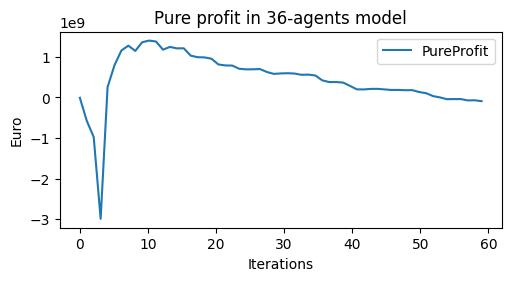

In [ ]:
x = np.linspace(0,len(OverallProfitForIterationList),len(OverallProfitForIterationList))  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, dfPL10mln['PureProfit'], label='PureProfit')  # Plot more data on the Axes...
ax.set_xlabel('Iterations')  # Add an x-label to the Axes.
ax.set_ylabel('Euro')  # Add a y-label to the Axes.
ax.set_title("Pure profit in 36-agents model")  # Add a title to the Axes.
ax.legend()  # Add a legend.

In [ ]:
ResultingList = [(i,j,k,l) for i,j,k,l in zip(ProfitMFList, LossMFList, IterMFList, MQsMFList)]

In [ ]:
ResultingList

[]

In [ ]:
newRL = np.transpose(ResultingList)

In [ ]:
trashlist = []

for i in range(len(profit_a)):
  trashlist.append(i)

trashlist

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58]

In [ ]:
newRL

array([[ 0.00000000e+00,  0.00000000e+00,  4.92206540e+07,
         1.04376343e+08,  1.15914167e+08,  1.44423029e+08,
         1.64014320e+08,  2.28156453e+08,  2.75166500e+08,
         3.38123591e+08,  4.04122554e+08,  4.72900544e+08,
         5.78552983e+08,  2.74858056e+08,  2.88631896e+08,
         3.45981192e+08,  4.00047710e+08,  4.89209259e+08,
         4.96458260e+08,  6.05690046e+08],
       [ 1.06795396e+07,  2.00287423e+07,  2.77882235e+07,
         3.52831688e+07,  4.71399221e+07,  5.88668536e+07,
         7.55453016e+07,  9.66926415e+07,  1.48477174e+08,
         2.26296384e+08,  4.28137974e+08,  5.93666656e+08,
         8.93750387e+08,  1.14080189e+08,  1.26661534e+08,
         1.48275196e+08,  2.03595969e+08,  2.52300037e+08,
         4.99305213e+08,  6.72713339e+08],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  3.00000000e+00,  7.00000000e+00,
         8.00000000e+00,  9.00000000e+00,  1.40000000e+01,
         1.90000000e+01,  2.0

In [ ]:
np.linspace(100, 10000, 20)[14]

7394.736842105263

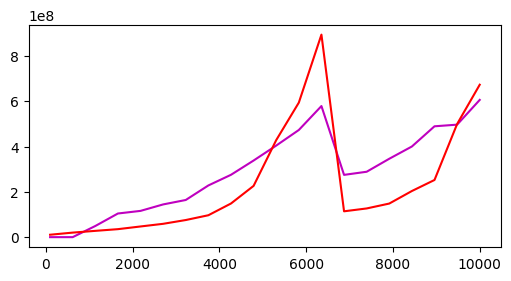

In [ ]:
data = {
    'iteration': np.linspace(100, 10000, 20),
    'profits': newRL[0],
    'losses': newRL[1],
}


df = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(np.linspace(100, 10000, 20), newRL[0], color = 'm')
ax.plot(np.linspace(100, 10000, 20), newRL[1], color = 'r')
ax.set_xlabel('MF')  # Add an x-label to the Axes.
ax.set_ylabel('Euro')  # Add a y-label to the Axes.
ax.set_title(" Total profit and total loss in 36-agents model")  # Add a title to the Axes.
ax.legend()  # Add a legend.

In [ ]:
list_for_Graph = []

In [ ]:
for i in list(G.nodes):
  if i != 's':
    if i != 'q':
      list_for_Graph.append(i)
    else:
      continue
  else:
    continue

In [ ]:
FlowByIter = np.transpose(MigrantsFlowByPlayer)[44]

In [ ]:
ListFlowByIter = list(FlowByIter)

In [ ]:
ListFlowByIter.pop(-1)

-4818.280000000002

In [ ]:
ListFlowByIter.remove(0)

In [ ]:
ListVertices = list(verticesDict)

In [ ]:
ListVertices.pop(-1)

'q'

<BarContainer object of 34 artists>

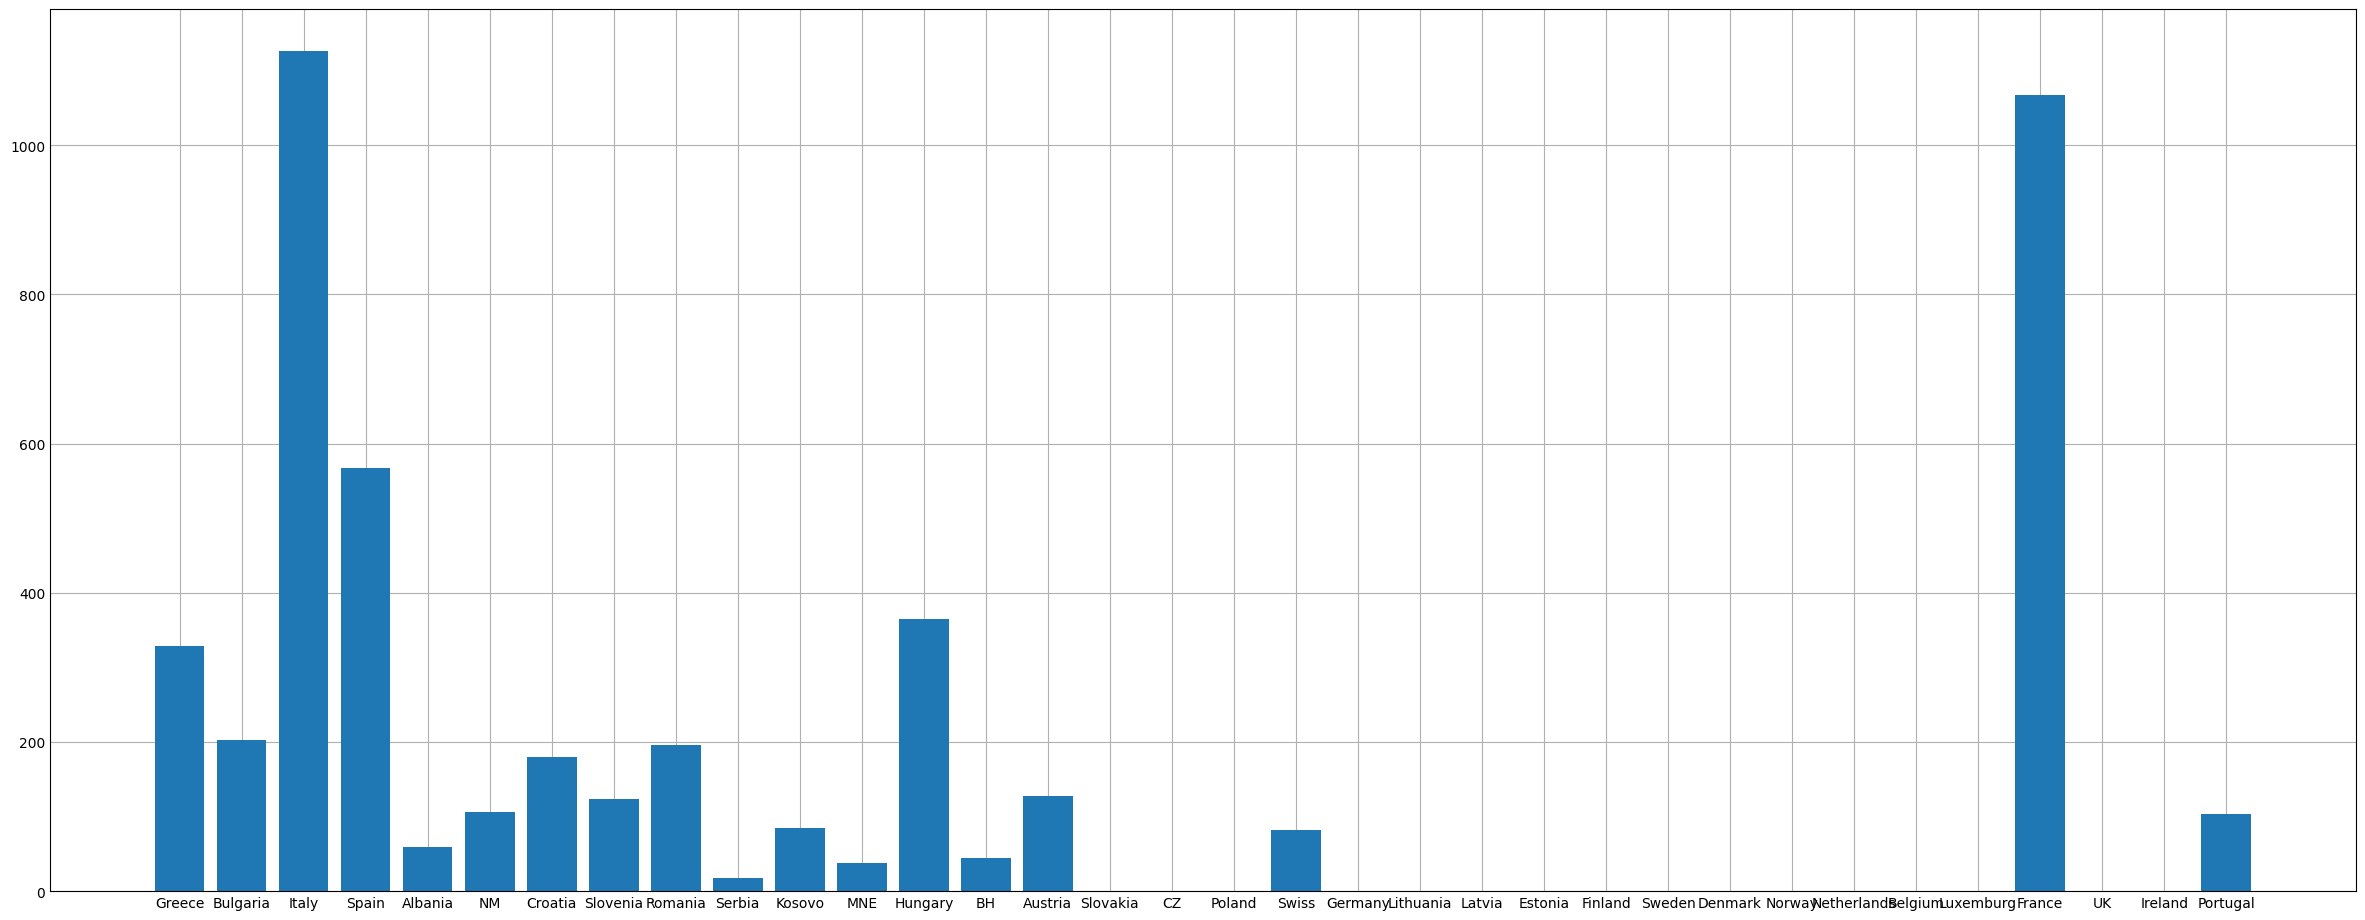

In [ ]:
plt.style.use('_mpl-gallery')

x = list_for_Graph
y = ListFlowByIter

plt.figure(figsize=(80, 9))

plt.subplot(131)
plt.bar(x, y)

In [ ]:
-0.5*verticesDict.get('Bulgaria')[4]*verticesDict.get('Bulgaria')[5]*((233/verticesDict.get('Bulgaria')[0])**2)*verticesDict.get('Bulgaria')[1]*1000

7780835.999024424

In [ ]:
def adoptionC(i):
  adoptionCostRatio = (1+(1*reproductionRatio)**1)/(math.log(verticesDict.get(i)[0]+0.0001, 2))
  return adoptionCostRatio

adoptCost = adoptionC('Croatia')

#ACSerbia 0.86

In [ ]:
#'Serbia': [7114, 39629000, 4.43, -0.00096, 0.48, -0.68144, 17.496]

In [ ]:
#DirectCostOfAdoption: (yearlyNetMedianWage - yearlyCustomerBasket)(in thousands)*1000*MigrantsFlow
verticesDict.get('Croatia')[6]*1000*290

4913760.0

In [ ]:
#LostProfitToCountryDGP: MigrantsFlow*(NetWage/GrossWage)*((GrossWagePerHour) - MigrantsFlow*GrossWageDecreasingRate)*WorkHours*RemittancesRatio
290*0.6*(verticesDict.get('Croatia')[2]-290*verticesDict.get('Croatia')[3])*1800*remittancesRatio

-349800865.2

In [ ]:
#quadraticRegression for socialEnthropyRatio
(((item/verticesDict.get('Germany')[0]-socialEnthropyRatio)*0.00001*verticesDict.get('Germany')[1])**2)+20000+np.e**(2+(0.003*verticesDict.get('Germany')[0])*(item/verticesDict.get('Germany')[0]))*verticesDict.get('Germany')[6]*1000*item*crimeRatio

7725807.146471745

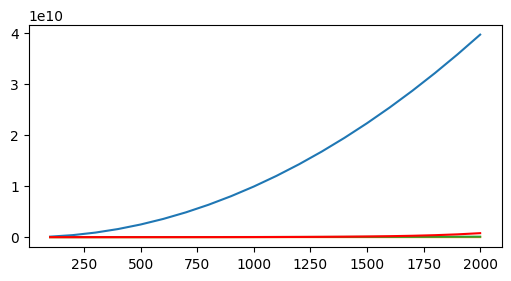

In [ ]:
import numpy as np
country = 'Luxemburg'

item = np.linspace(100, 2000, 20)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(item, -0.5*verticesDict.get(country)[4]*verticesDict.get(country)[5]*((item/verticesDict.get(country)[0])**2)*verticesDict.get(country)[1]*1000, label='profit')  # Plot some data on the Axes.
ax.plot(item, verticesDict.get(country)[6]*1000*item/3, label='DCA')  # Plot more data on the Axes...
ax.plot(item, item*0.6*(np.sqrt((verticesDict.get(country)[2]-item*verticesDict.get(country)[3]))**2)*1800*remittancesRatio, label='LPCD')  # ... and some more.
ax.plot(item, (((item/verticesDict.get(country)[0]-socialEnthropyRatio)*0.00001*verticesDict.get(country)[1])**2)+20000+np.e**(2+(0.003*verticesDict.get(country)[0])*(item/verticesDict.get(country)[0]))*verticesDict.get(country)[6]*1000*item*crimeRatio, label='LSER', color = 'red')